Breast cancer (BC) is one of the most common cancers among women worldwide, representing the majority of new cancer cases and cancer-related deaths according to global statistics, making it a significant public health problem in today’s society.

Some Risk Factors for Breast Cancer
The following are some of the known risk factors for breast cancer. However, most cases of breast cancer cannot be linked to a specific cause. Talk to your doctor about your specific risk.

Age. The chance of getting breast cancer increases as women age. Nearly 80 percent of breast cancers are found in women over the age of 50.

Personal history of breast cancer. A woman who has had breast cancer in one breast is at an increased risk of developing cancer in her other breast.

Family history of breast cancer. A woman has a higher risk of breast cancer if her mother, sister or daughter had breast cancer, especially at a young age (before 40). Having other relatives with breast cancer may also raise the risk.

Genetic factors. Women with certain genetic mutations, including changes to the BRCA1 and BRCA2 genes, are at higher risk of developing breast cancer during their lifetime. Other gene changes may raise breast cancer risk as well.

Childbearing and menstrual history. The older a woman is when she has her first child, the greater her risk of breast cancer. Also at higher risk are:

1.Women who menstruate for the first time at an early age (before 12)

2.Women who go through menopause late (after age 55)

3.Women who’ve never had children

## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

## Importing dataset

The dataset can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Breast Cancer Detection/data.csv")
data.shape

(569, 33)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Exploration

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Checking how many null values and NaN values are there in the dataset

In [ ]:
data.isnull().sum()
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## Data preprocessing

Splitting data into features and categories. In our dataset "diagnosis" column has the categories("M" for malignant or "B" for benign) in it i.e based on the input variables we will be predicting if a case is "M" or "B"

In [ ]:
X = data.iloc[:, 2:32].values
Y = data.iloc[:, 1].values

For handling the categorical data we will be using Label encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

To check if there are any outliers or not, let's plot a distribution of each features.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8e2abfad0>,
      dtype=object)

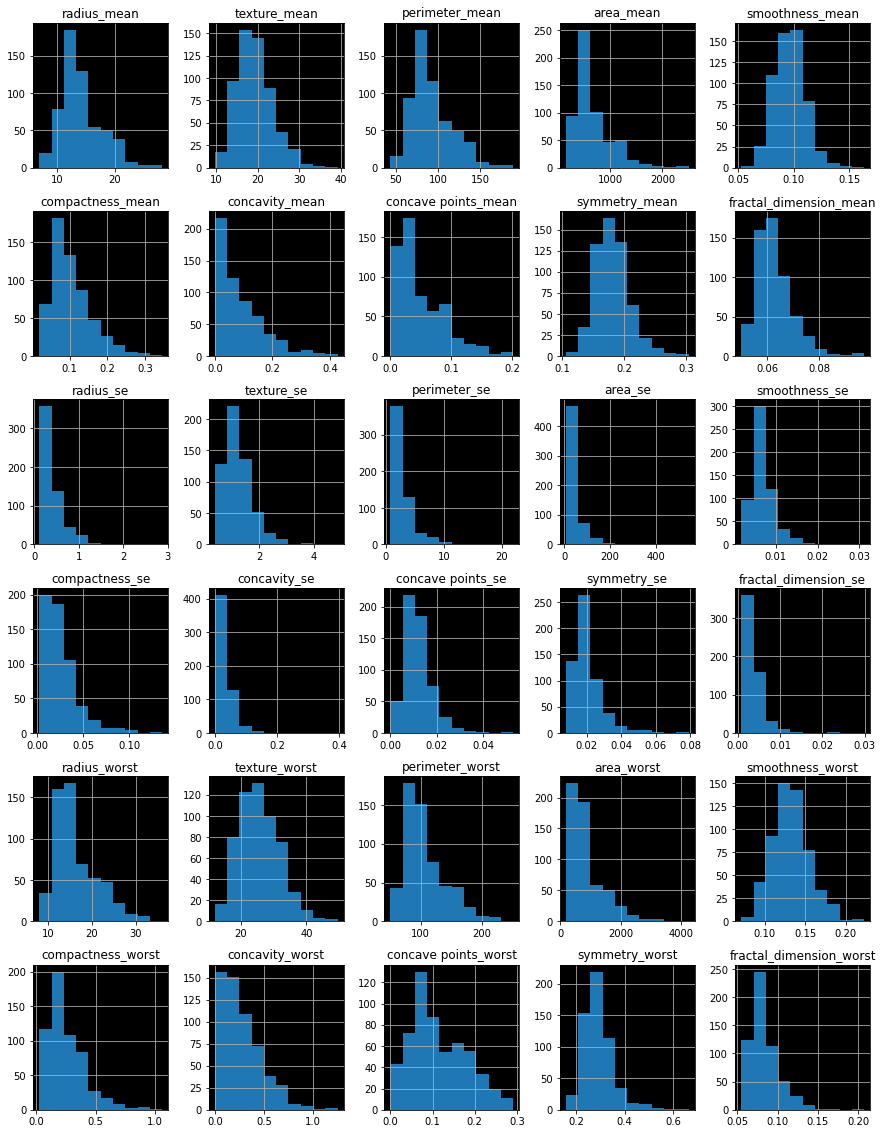

In [ ]:
X_data = data.iloc[:, 2:32]
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
X_data.hist(ax = ax)

From the above visualization we can conclude that there are no outliers in our dataset.

Now we will be spliting the dataset into training set and test set to train our model.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

To normalize the range of the features, we will use feature scaling on X_train and X_test.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Model Selection

In [ ]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
cls_log = LogisticRegression(random_state = 0)
cls_log.fit(X_train, Y_train)

#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
cls_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
cls_KNN.fit(X_train, Y_train)

#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
cls_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
cls_dt.fit(X_train, Y_train)

#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
cls_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
cls_rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
Y_pred_log = cls_log.predict(X_test)
Y_pred_KNN = cls_KNN.predict(X_test)
Y_pred_rf = cls_rf.predict(X_test)
Y_pred_dt = cls_dt.predict(X_test)

Let's create confusion matrix of all the models that we trained.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_log = confusion_matrix(Y_test, Y_pred_log)
cm_KNN = confusion_matrix(Y_test, Y_pred_KNN)
cm_rf = confusion_matrix(Y_test, Y_pred_rf)
cm_dt = confusion_matrix(Y_test, Y_pred_dt)

In [ ]:
print(cm_log)
print(cm_KNN)
print(cm_rf)
print(cm_dt)

[[87  3]
 [ 3 50]]
[[89  1]
 [ 6 47]]
[[89  1]
 [ 1 52]]
[[86  4]
 [ 2 51]]


For better understanding we will make visualizations of the confusion matrix of each model.

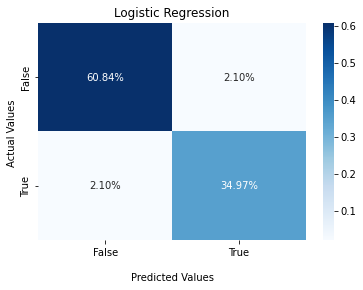

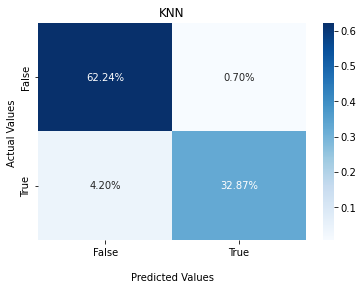

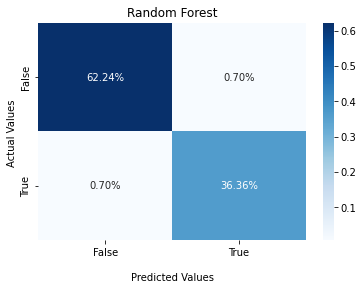

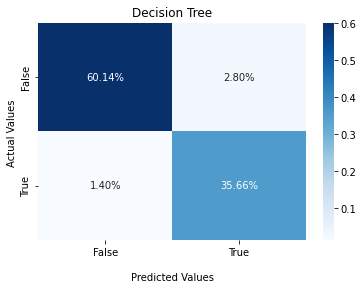

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
classifiers = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree']
matrices = [cm_log, cm_KNN, cm_rf, cm_dt]

for i, cf_matrix in enumerate(matrices):
    ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

    ax.set_title(classifiers[i])
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

Let's plot ROC and AUC curve of the models 

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

In [ ]:
#for Logistic Regression
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, Y_pred_log)
#for KNN
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(Y_test, Y_pred_KNN)
#for Random Forest
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(Y_test, Y_pred_rf)
#for Decison Tree
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(Y_test, Y_pred_dt)


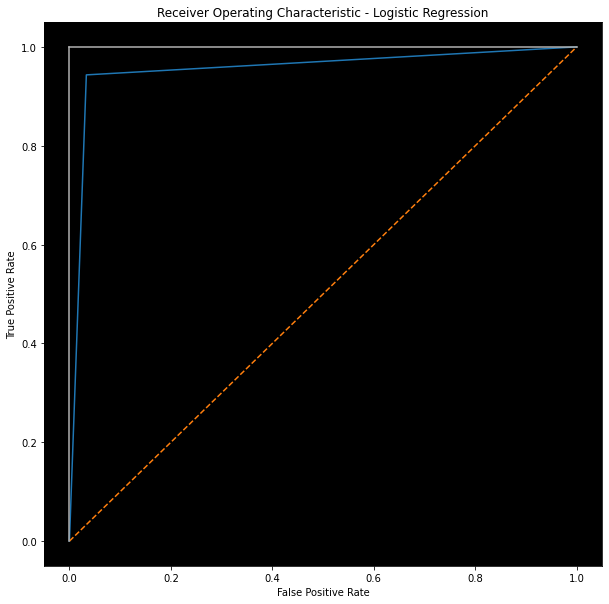

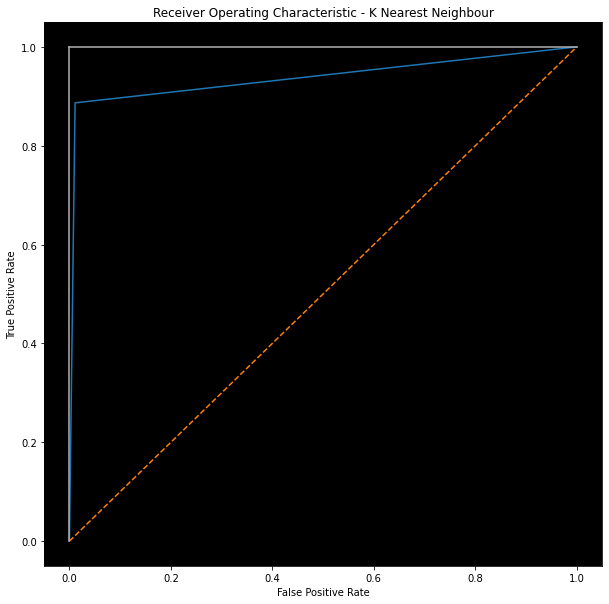

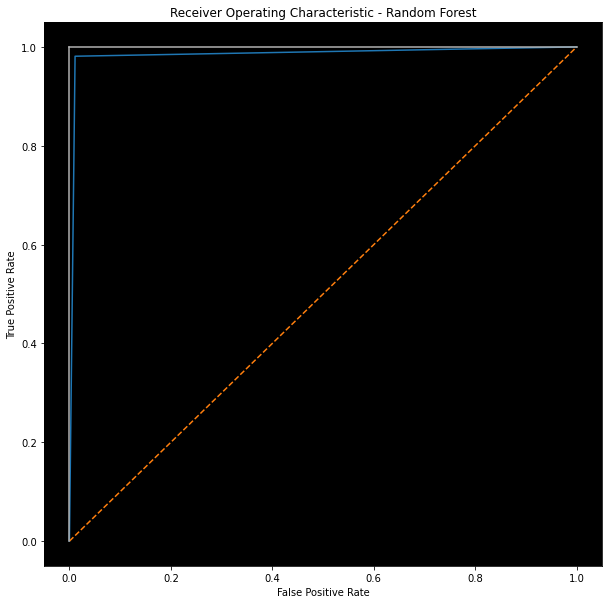

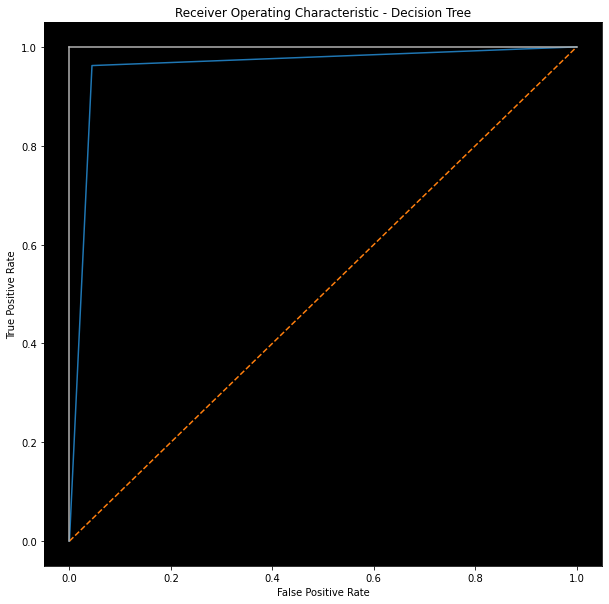

In [ ]:
#for Logistic Regression   
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#for KNN   
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - K Nearest Neighbour')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#for Random Forest   
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#for Decison Tree   
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.plot(false_positive_rate4, true_positive_rate4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Now, we will calculate the accuracy scores of each model

In [ ]:
from sklearn.metrics import accuracy_score

acc_log = f'{accuracy_score(Y_test,Y_pred_log):.2%}'
acc_KNN = f'{accuracy_score(Y_test,Y_pred_KNN):.2%}'
acc_rf = f'{accuracy_score(Y_test,Y_pred_rf):.2%}'
acc_dt = f'{accuracy_score(Y_test,Y_pred_dt):.2%}'

models = pd.Series(['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree'])
accuracy_scores = pd.Series([acc_log, acc_KNN, acc_rf, acc_dt])

accuracy_table = pd.DataFrame({'Models': models, 'Accuracy_Score': accuracy_scores})
accuracy_table

,Models,Accuracy_Score
0,Logistic Regression,95.80%
1,KNN,95.10%
2,Random Forest,98.60%
3,Decision Tree,95.80%


Let's calculate the precision scores of each model as well.

In [ ]:
from sklearn.metrics import precision_score

prec_log = f'{precision_score(Y_test,Y_pred_log):.2%}'
prec_KNN = f'{precision_score(Y_test,Y_pred_KNN):.2%}'
prec_rf = f'{precision_score(Y_test,Y_pred_rf):.2%}'
prec_dt = f'{precision_score(Y_test,Y_pred_dt):.2%}'

accuracy_scores = pd.Series([prec_log, prec_KNN, prec_rf, prec_dt])

precision_table = pd.DataFrame({'Models': models, 'Precision_Score': accuracy_scores})
precision_table

,Models,Precision_Score
0,Logistic Regression,94.34%
1,KNN,97.92%
2,Random Forest,98.11%
3,Decision Tree,92.73%


### In this project we used wisconsin breast cancer dataset and we did a comparative study of different machine learning classifiers on the detection of breast cancer. As a result of our study, we found that 'Random Forest classifier' is the best for detecting breast cancer as it has 98.11% precision and 98.60% accuracy.